## Importing Libraries


In [832]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Dataset

In [833]:
dataset = pd.read_csv("updated_pollution_dataset.csv",encoding='utf-8')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [834]:
X

array([[ 29.8 ,  59.1 ,   5.2 , ...,   1.72,   6.3 , 319.  ],
       [ 28.3 ,  75.6 ,   2.3 , ...,   1.64,   6.  , 611.  ],
       [ 23.1 ,  74.7 ,  26.7 , ...,   1.63,   5.2 , 619.  ],
       ...,
       [ 25.9 ,  78.2 ,  14.2 , ...,   1.63,   9.6 , 379.  ],
       [ 25.3 ,  44.4 ,  21.4 , ...,   0.89,  11.6 , 241.  ],
       [ 24.1 ,  77.9 ,  81.7 , ...,   1.38,   8.3 , 461.  ]])

In [835]:
y

array(['Moderate', 'Moderate', 'Moderate', ..., 'Moderate', 'Good',
       'Moderate'], dtype=object)

  ## Categorical** data, dependent variable (Air_Quality) is ordinal

In [836]:
y = pd.Series(y).map({'Good': 0, 'Moderate': 1, 'Poor': 2, 'Hazardous': 3})

In [837]:
y

,0
0,1
1,1
2,1
3,0
4,0
...,...
4995,3
4996,1
4997,1
4998,0


## Splitting dataset into training ans test data

In [838]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [839]:
X_train

array([[ 39.1 ,  82.9 ,  56.7 , ...,   2.  ,   3.6 , 543.  ],
       [ 22.1 ,  83.  ,   0.7 , ...,   1.6 ,   6.3 , 512.  ],
       [ 34.5 ,  77.7 ,   6.2 , ...,   1.71,   8.1 , 500.  ],
       ...,
       [ 24.2 ,  67.6 ,  19.4 , ...,   1.91,   6.2 , 422.  ],
       [ 21.4 ,  76.4 ,  15.3 , ...,   0.96,  16.3 , 420.  ],
       [ 34.4 , 103.1 ,  29.2 , ...,   3.37,   3.7 , 614.  ]])

In [840]:
X_test

array([[ 31.3 ,  73.4 ,  72.8 , ...,   2.54,   2.6 , 755.  ],
       [ 24.  ,  68.8 ,   0.8 , ...,   1.16,  10.5 , 235.  ],
       [ 25.4 ,  78.6 ,   4.1 , ...,   1.4 ,  10.1 , 543.  ],
       ...,
       [ 34.7 ,  75.8 ,   2.7 , ...,   1.5 ,   7.8 , 335.  ],
       [ 22.2 ,  98.7 ,  13.2 , ...,   1.54,   3.8 , 471.  ],
       [ 22.7 ,  73.6 ,   8.2 , ...,   1.14,  12.2 , 472.  ]])

In [841]:
y_train

,0
1840,2
2115,1
4437,1
1146,0
2486,1
...,...
4426,1
466,1
3092,2
3772,0


In [842]:
y_test

,0
1501,3
2586,0
2653,1
1055,3
705,0
...,...
3563,0
1538,1
1837,1
2380,2


## Feature Scaling

In [843]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training Model

In [844]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [845]:
y_pred = model.predict(X_test)

In [846]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual  Predicted
1501       3          3
2586       0          0
2653       1          1
1055       3          3
705        0          0
...      ...        ...
3563       0          0
1538       1          2
1837       1          1
2380       2          2
1912       0          0

[1500 rows x 2 columns]


## Accuracy

In [847]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.6f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.940000

Confusion Matrix:
[[618   0   0   0]
 [  2 434  16   0]
 [  0  20 246  16]
 [  0   1  35 112]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       618
           1       0.95      0.96      0.96       452
           2       0.83      0.87      0.85       282
           3       0.88      0.76      0.81       148

    accuracy                           0.94      1500
   macro avg       0.91      0.90      0.90      1500
weighted avg       0.94      0.94      0.94      1500



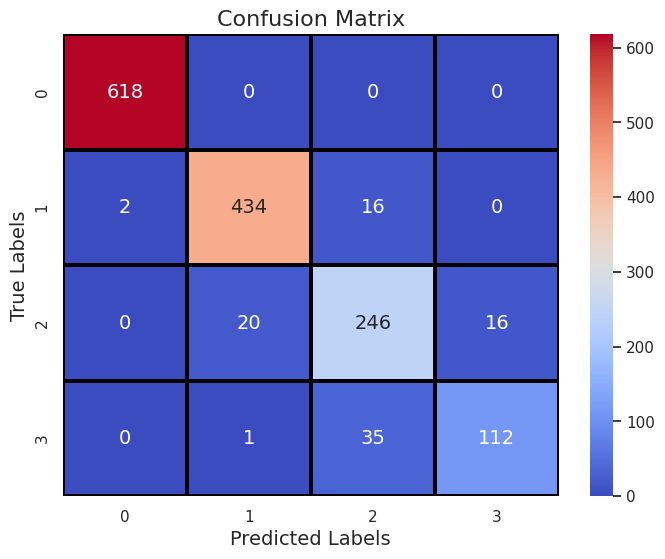

In [848]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Improved Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Set font size for labels
sns.set(style='whitegrid')

# Plot confusion matrix as a heatmap with annotations and color bar
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test),
            annot_kws={"size": 14}, linewidths=1.5, linecolor='black')

plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


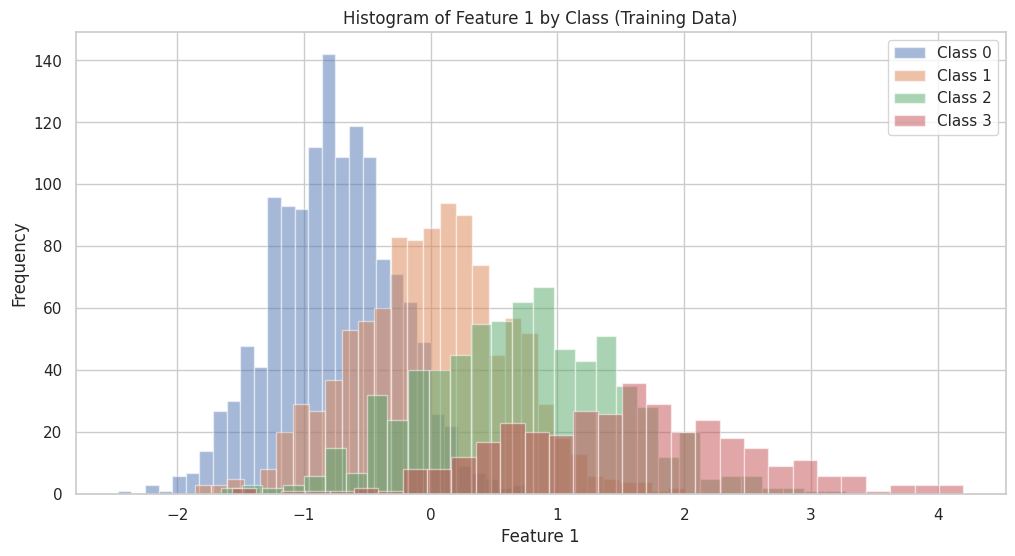

<ipython-input-849-0a256ca7f3fd>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train[:, 0], palette='Set2')


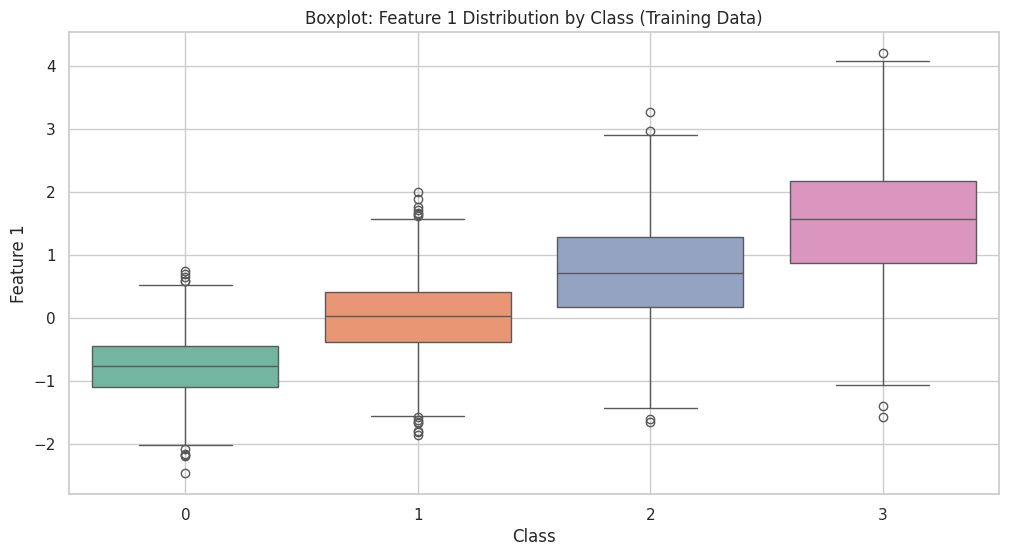

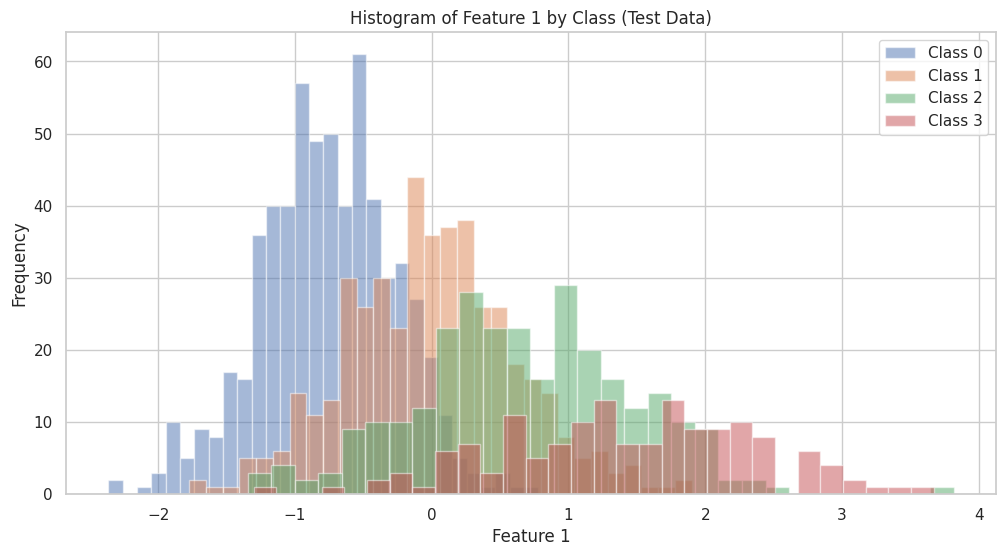

<ipython-input-849-0a256ca7f3fd>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_test, y=X_test[:, 0], palette='Set2')


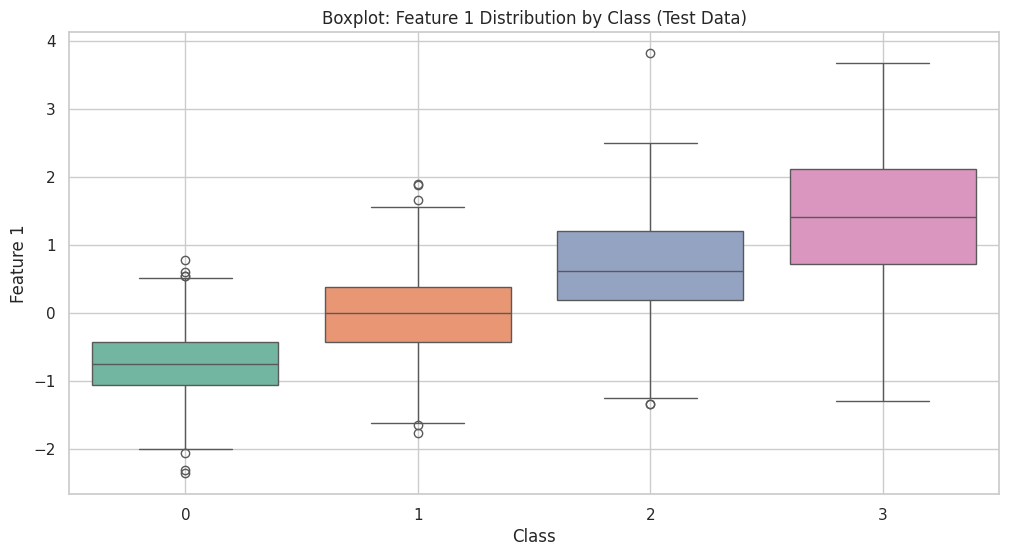

In [849]:
# 1. Histogram of Features by Class (Training Data)
plt.figure(figsize=(12, 6))
for i in range(4):  # Looping through classes (Good, Moderate, Poor, Hazardous)
    plt.hist(X_train[y_train == i, 0], bins=30, alpha=0.5, label=f"Class {i}")
plt.title("Histogram of Feature 1 by Class (Training Data)")
plt.xlabel("Feature 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 2. Boxplots for Feature Distributions by Class (Training Data)
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train, y=X_train[:, 0], palette='Set2')
plt.title("Boxplot: Feature 1 Distribution by Class (Training Data)")
plt.xlabel("Class")
plt.ylabel("Feature 1")
plt.grid(True)
plt.show()

# 3. Histogram of Features by Class (Test Data)
plt.figure(figsize=(12, 6))
for i in range(4):  # Looping through classes (Good, Moderate, Poor, Hazardous)
    plt.hist(X_test[y_test == i, 0], bins=30, alpha=0.5, label=f"Class {i}")
plt.title("Histogram of Feature 1 by Class (Test Data)")
plt.xlabel("Feature 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# 4. Boxplots for Feature Distributions by Class (Test Data)
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_test, y=X_test[:, 0], palette='Set2')
plt.title("Boxplot: Feature 1 Distribution by Class (Test Data)")
plt.xlabel("Class")
plt.ylabel("Feature 1")
plt.grid(True)
plt.show()